In [17]:
https://youtu.be/fzj4VUcRXUs

from collections import deque

tree={
    'A':['B','C'],
    'B':['D','E'],
    'C':[],
    'D':[],
    'E':[]
}

def bfs_tree(start):
    visited = []
    queue= deque([start])

    while queue:
        node= queue.popleft()
        visited.append(node)
        queue.extend(tree[node])

    return visited

def dfs_tree(start):
    visited =[]
    stack= [start]

    while stack:
       node=stack.pop()
       if node not in visited:
            visited.append(node)
            stack.extend(reversed(tree[node]))

    return visited

print("BFS (tree)",bfs_tree('A'))
print("DFS (tree)",dfs_tree('A'))


BFS (tree) ['A', 'B', 'C', 'D', 'E']
DFS (tree) ['A', 'B', 'D', 'E', 'C']


In [25]:
from collections import deque

graph = {
    'A': ['B', 'C'],
    'B': ['A', 'C', 'D'],
    'C': ['A', 'B'],
    'D': ['B']
}

def bfs_graph(graph, start):
    visited = set()
    queue = deque([start])
    result = []

    while queue:
        node = queue.popleft()
        if node not in visited:
            visited.add(node)  # Fix: use set's add method
            result.append(node)
            queue.extend(neighbour for neighbour in graph[node] if neighbour not in visited)
    return result

def dfs_graph(graph, node, visited=None):
    if visited is None:
        visited = set()
    visited.add(node)
    result = [node]
    for neighbour in graph[node]:
        if neighbour not in visited:
            result.extend(dfs_graph(graph, neighbour, visited))
    return result

# Fixed variable name
start_node = 'A'
bfs_graph_result = bfs_graph(graph,start_node)
dfs_graph_result = dfs_graph(graph,start_node)

print("BFS Graph",bfs_graph_result)
print("DFS Graph",dfs_graph_result)


BFS Graph ['A', 'B', 'C', 'D']
DFS Graph ['A', 'B', 'C', 'D']


      Size  BFS Time (s)  DFS Time (s)
0     1000      0.000189      0.000055
1    40000      0.025275      0.010989
2    80000      0.069807      0.025333
3   200000      0.083460      0.122888
4  1000000      1.224950      0.488025


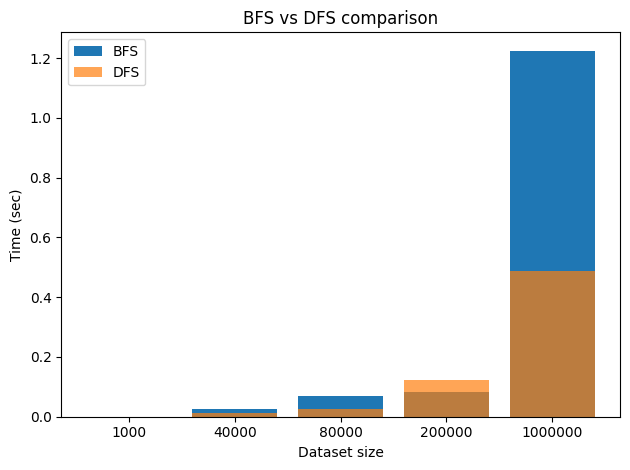

In [7]:
import random
import time
import pandas as pd
import matplotlib.pyplot as plt
from collections import deque


sizes = [1000, 40000, 80000, 200000, 1000000]
results = []


class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None


def insert(root, value):
    if root is None:
      return Node(value)
    if value < root.value:
        root.left = insert(root.left, value)
    else:
        root.right = insert(root.right, value)
    return root

# Build BST from list
def build_tree(data):
    root = None
    for val in data:
        root = insert(root, val)
    return root


def bfs(root, target):
    start = time.time()
    queue = deque([root])
    while queue:
        node = queue.popleft()
        if node:
            if node.value == target:
                break
            queue.append(node.left)
            queue.append(node.right)
    return time.time() - start


def dfs(root, target):
    start = time.time()
    stack = [root]
    while stack:
        node = stack.pop()
        if node:
            if node.value == target:
                break
            stack.append(node.right)
            stack.append(node.left)
    return time.time() - start


for size in sizes:
    data = random.sample(range(size * 2), size)
    root = build_tree(data)
    goal = data[-220]
    bfs_time = bfs(root, goal)
    dfs_time = dfs(root, goal)
    results.append({'Size': size, 'BFS Time (s)': bfs_time, 'DFS Time (s)': dfs_time})


df = pd.DataFrame(results)
print(df)


plt.bar([str(x) for x in df['Size']], df['BFS Time (s)'], label='BFS')
plt.bar([str(x) for x in df['Size']], df['DFS Time (s)'], label='DFS', alpha=0.7)
plt.xlabel('Dataset size')
plt.ylabel('Time (sec)')
plt.title('BFS vs DFS comparison')
plt.legend()
plt.tight_layout()
plt.show()


In [11]:
from collections import deque


graph = {
    'Islamabad': ['Rawalpindi', 'Lahore', 'Peshawar'],
    'Rawalpindi': ['Islamabad', 'Peshawar', 'Quetta'],
    'Peshawar': ['Islamabad', 'Rawalpindi', 'Quetta'],
    'Lahore': ['Islamabad', 'Multan', 'Quetta'],
    'Multan': ['Lahore', 'Karachi', 'Quetta'],
    'Quetta': ['Rawalpindi', 'Peshawar', 'Multan', 'Karachi'],
    'Karachi': ['Multan', 'Quetta']
}


def bfs_shortest_path(graph, start, goal):
    queue = deque([[start]])


    visited = set([start])

    while queue:
        path = queue.popleft()
        current_city = path[-1]

        if current_city == goal:
            return path

        for neighbor in graph[current_city]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(path + [neighbor])

    return None


start_city = 'Islamabad'
goal_city = 'Karachi'
shortest_path = bfs_shortest_path(graph, start_city, goal_city)


if shortest_path:
    print(f"The shortest path from {start_city} to {goal_city} is:")
    print(" -> ".join(shortest_path))
else:
    print(f"No path found from {start_city} to {goal_city}.")

The shortest path from Islamabad to Karachi is:
Islamabad -> Rawalpindi -> Quetta -> Karachi
